<a href="https://colab.research.google.com/github/prabal5ghosh/Autonomous-Taxi-Agent-game-using-Q-learning-SARSA-and-Deep-Q-learning/blob/main/notebook_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2>Autonomous Taxi Agent</h2>
<h4>In this notebook, I will implement the Q-learning algorithm from scratch</h4>

In [1]:
import numpy as np
import gym
import matplotlib.pyplot as plt

In [2]:
env = gym.make('Taxi-v3')

/usr/local/lib/python3.11/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.11/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [3]:
! pip install pygame

In [4]:
!apt-get install -y xvfb python-opengl > /dev/null 2>&1

In [5]:
!pip install gym pyvirtualdisplay > /dev/null 2>&1

In [7]:
!apt-get install xvfb

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings xfonts-utils
  xserver-common
The following NEW packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings xfonts-utils
  xserver-common xvfb
0 upgraded, 9 newly installed, 0 to remove and 29 not upgraded.
Need to get 7,814 kB of archives.
After this operation, 12.0 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libfontenc1 amd64 1:1.1.4-1build3 [14.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxfont2 amd64 1:2.0.5-1build1 [94.5 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxkbfile1 amd64 1:1.1.0-1build3 [71.8 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/main amd64 x11-xkb-utils amd64 7.7+5build4 [172 kB]
Get:5 http://archiv

In [8]:
from IPython import display
from pyvirtualdisplay import Display
from matplotlib import animation

d = Display()
d.start()

Episode: 9
Score: -848


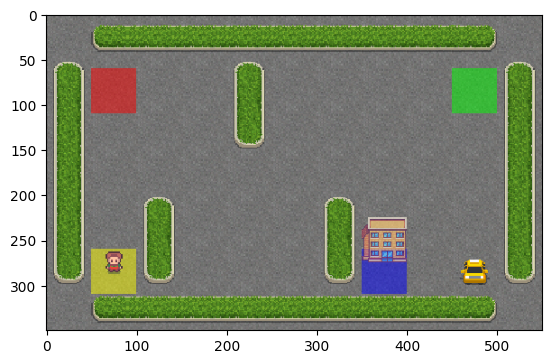

In [9]:
episodes = 10

for episode in range(1, episodes):
  state = env.reset()
  done = False
  score = 0
  prev_screen = env.render(mode='rgb_array')
  plt.imshow(prev_screen)
  img = []
  while not done:
    next_state, reward, done, info = env.step(env.action_space.sample())
    score += reward
    display.clear_output(wait=True)
    img.append(env.render('rgb_array'))
  print('Episode: {}\nScore: {}'.format(episode, score))


In [11]:
'''dpi = 72
interval = 50 # ms

plt.figure(figsize=(img[0].shape[1]/dpi,img[0].shape[0]/dpi),dpi=dpi)
patch = plt.imshow(img[0])
plt.axis=('off')
animate = lambda i: patch.set_data(img[i])
ani = animation.FuncAnimation(plt.gcf(),animate,frames=len(img),interval=interval)
display.display(display.HTML(ani.to_jshtml()))'''

"dpi = 72\ninterval = 50 # ms\n\nplt.figure(figsize=(img[0].shape[1]/dpi,img[0].shape[0]/dpi),dpi=dpi)\npatch = plt.imshow(img[0])\nplt.axis=('off')\nanimate = lambda i: patch.set_data(img[i])\nani = animation.FuncAnimation(plt.gcf(),animate,frames=len(img),interval=interval)\ndisplay.display(display.HTML(ani.to_jshtml()))"

<h2>Implement the Q-Learning Algorithm from scratch:</h2>

In [12]:
actions = env.action_space.n
state = env.observation_space.n

q_table = np.zeros((state, actions))

<h3>Create the Parameters for our Q-Learning Algorithm:</h3>

In [16]:
num_episodes = 10000
max_steps_per_episode = 100
learning_rate = .1
discount_rate = 0.99
exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_decay_rate = 0.001

rewards_all_episodes = []

<h4>The update function of the Q-Table:</h4>

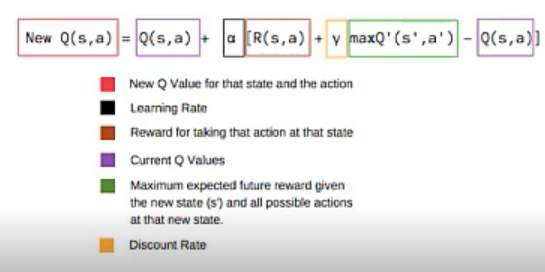

In [17]:
for episode in range(num_episodes):
  state = env.reset()
  done = False
  rewards_cur_episode = 0

  for step in range(max_steps_per_episode):

    #Exploration Vs Exploitation trade-off
    exploration_threshold = np.random.uniform(0, 1)
    # if greater than then we will take an action based on the q_table
    if exploration_threshold > exploration_rate:
      action = np.argmax(q_table[state,:])
    else:
      action = env.action_space.sample()

    next_state, reward, done, info = env.step(action)

    #Update Q-Table
    #the equation in the image above is without multipluing q_table[state, action] with (1-learning_rate)
    #this is a variation of the previous equation (most common used)
    q_table[state, action] = q_table[state, action]*(1-learning_rate) + learning_rate*(reward + discount_rate*np.max(q_table[next_state, :]))

    state = next_state
    rewards_cur_episode += reward

    if done == True:
      break

  #A mathemalical equation to decay the exploration rate over time so we start take action from our Q-Table instead of taking random action
  exploration_rate = min_exploration_rate + (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate * episode)

  rewards_all_episodes.append(rewards_cur_episode)

print("*******Training Finished*******")

*******Training Finished*******


In [18]:
q_table

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-0.64867244, -0.96409954, -1.59551577,  0.28823411,  9.6220697 ,
        -5.78710371],
       [ 8.23493866,  6.86011157,  2.4918394 ,  7.96862071, 14.11880599,
        -1.26130503],
       ...,
       [-1.61212535, 10.87666626, -0.8068388 , -1.47969411, -7.26349924,
        -7.02039113],
       [-2.49390889,  4.77026726, -2.51183445, -2.5084756 , -8.12372831,
        -6.34932739],
       [ 1.19882938,  1.4655916 , -0.19      , 18.00422375, -1.74251328,
        -2.71      ]])

<h3>Evaluating the Model:</h3>

In [19]:
rewards_per_1000_episodes = np.split(np.array(rewards_all_episodes), num_episodes/1000)
cnt = 1000

print("Average per thousand episodes")
for r in rewards_per_1000_episodes:
  print(cnt, ": ", str(sum(r/1000)))
  cnt += 1000


Average per thousand episodes
1000 :  -250.8169999999999
2000 :  -35.02900000000004
3000 :  2.459999999999988
4000 :  6.070999999999974
5000 :  6.941999999999971
6000 :  7.249999999999952
7000 :  7.208999999999966
8000 :  7.226999999999963
9000 :  7.4709999999999575
10000 :  7.350999999999966


step:  9  reward:  20
******Reached Goal******


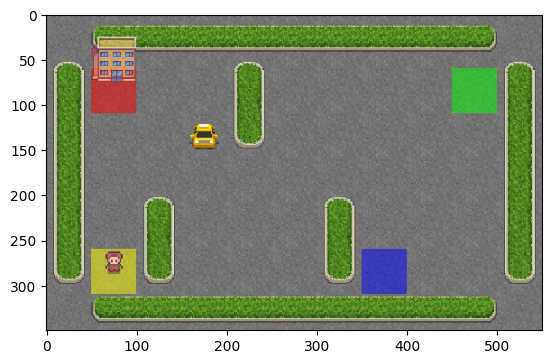

In [20]:
for episode in range(30):
  state = env.reset()
  done = False
  print("Episode: ", episode)

  prev_screen = env.render(mode='rgb_array')
  plt.imshow(prev_screen)
  img = []
  for step in range(max_steps_per_episode):
    action = np.argmax(q_table[state, :])

    next_state, reward, done, info = env.step(action)

    display.clear_output(wait=True)
    img.append(env.render('rgb_array'))

    print("step: ", step, " reward: ", reward)


    if done:
      #display.clear_output(wait=True)
      if reward == 20:
        print("******Reached Goal******")
      else:
        print("******Failed******")
      img.append(env.render('rgb_array'))

      break
    state = next_state

env.close()

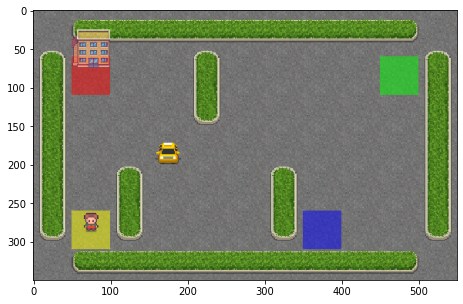

In [21]:
dpi = 72
interval = 50 # ms

plt.figure(figsize=(img[0].shape[1]/dpi,img[0].shape[0]/dpi),dpi=dpi)
patch = plt.imshow(img[0])
plt.axis=('off')
animate = lambda i: patch.set_data(img[i])
ani = animation.FuncAnimation(plt.gcf(),animate,frames=len(img),interval=interval)
display.display(display.HTML(ani.to_jshtml()))